In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [44]:
df = pd.read_csv('houseprice.csv')
df

,area,price,bedrooms,age
0,2600,550000,3.0,20
1,3000,565000,4.0,15
2,3200,610000,NaN,18
3,3600,680000,3.0,30
4,4000,725000,5.0,8


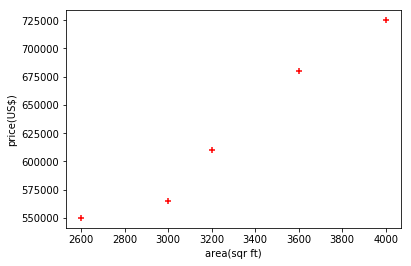

In [24]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area,df.price,color='red',marker='+')

In [22]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
reg.predict([[3300]])
# y=n*x+b

array([628715.75342466])

In [29]:
reg.coef_

array([135.78767123])

In [30]:
reg.intercept_

180616.43835616432

In [36]:
d = pd.read_csv('test.csv')
d.head()

,area
0,1000
1,1500
2,3200
3,4800
4,800


In [41]:
p = reg.predict(d)

In [45]:
d['price'] = p
d.to_csv("prediction.csv", index=False)

In [57]:
#For Multiple Variables (LR)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [58]:
df =pd.read_csv("houseprice.csv")
df

,area,price,bedrooms,age
0,2600,550000,3.0,20
1,3000,565000,4.0,15
2,3200,610000,NaN,18
3,3600,680000,3.0,30
4,4000,725000,5.0,8


In [70]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [71]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,price,bedrooms,age
0,2600,550000,3.0,20
1,3000,565000,4.0,15
2,3200,610000,3.0,18
3,3600,680000,3.0,30
4,4000,725000,5.0,8


In [72]:
model = linear_model.LinearRegression()
model.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
model.predict([[3000,3,40]])

array([597200.])

In [80]:
#Shaving model as Pickle to reuse

import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [84]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)
mp.predict([[3000,3,40]])

array([597200.])

In [85]:
# Shaving model as Joblib to reuse

from sklearn.externals import joblib
joblib.dump(model,'model_joblib')

['model_joblib']

In [86]:
mj = joblib.load('model_joblib')
mj.predict([[3000,3,40]])

array([597200.])